In [1]:
import os
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import mlem.mlem_reconstruct as mr

import datetime

## Read fastmc files:

If the number of coincidences we want to use is relatively high, better use the script to create the raw files

In [ ]:
eventsPath = '/data/PETALO/full_body/phantom/fastsim_tof_thr_charge/'
thrs = ['0.5', '1.0', '1.5']
cols = ['event_id', 'true_energy', 
        'true_r1', 'true_phi1', 'true_z1', 'true_t1', 
        'true_r2', 'true_phi2', 'true_z2', 'true_t2', 'phot_like1', 'phot_like2',
        'reco_r1', 'reco_phi1', 'reco_z1', 'reco_t1',
        'reco_r2', 'reco_phi2', 'reco_z2', 'reco_t2']

## We only take the events with energy above the energy threshold
df_0 = pd.DataFrame(columns=cols)
df_1 = pd.DataFrame(columns=cols)
df_2 = pd.DataFrame(columns=cols)

start         = 0
numb_of_files = 5000
printcounter  = 0

for file_number in range(start, start+numb_of_files):
    if (printcounter == 100):
        print(f'Analizing file {file_number}')
        print(datetime.time)
        printcounter = 0
    for th in thrs:
        filename  = f'full_body_phantom_sim_reco_thr{th}pes.{file_number}.h5'
        file_name = eventsPath+filename
        try:
            table = pd.read_hdf(file_name, 'reco/table')
            sel_below_th = (table.true_energy > 0.) & (table.true_r1 == 0.)
            reco = table[~sel_below_th]
            if th == '0.5':
                df_0 = pd.concat([df_0, reco], ignore_index=True, sort=False)
            elif th == '1.0':
                df_1 = pd.concat([df_1, reco], ignore_index=True, sort=False)
            elif th == '1.5':
                df_2 = pd.concat([df_2, reco], ignore_index=True, sort=False)
        except:
            print('File {} not found'.format(filename))
            continue
    printcounter += 1

Analizing file 100
<class 'datetime.time'>
Analizing file 200
<class 'datetime.time'>
Analizing file 300
<class 'datetime.time'>
Analizing file 400
<class 'datetime.time'>
Analizing file 500
<class 'datetime.time'>
Analizing file 600
<class 'datetime.time'>
Analizing file 700
<class 'datetime.time'>
Analizing file 800
<class 'datetime.time'>
Analizing file 900
<class 'datetime.time'>
Analizing file 1000
<class 'datetime.time'>
Analizing file 1100
<class 'datetime.time'>
Analizing file 1200
<class 'datetime.time'>
Analizing file 1300
<class 'datetime.time'>
Analizing file 1400
<class 'datetime.time'>
Analizing file 1500
<class 'datetime.time'>
Analizing file 1600
<class 'datetime.time'>
Analizing file 1700
<class 'datetime.time'>
Analizing file 1800
<class 'datetime.time'>
Analizing file 1900
<class 'datetime.time'>
Analizing file 2000
<class 'datetime.time'>
Analizing file 2100
<class 'datetime.time'>
Analizing file 2200
<class 'datetime.time'>
Analizing file 2300
<class 'datetime.time

In [3]:
df_0.head()

,event_id,true_energy,true_r1,true_phi1,true_z1,true_t1,true_r2,true_phi2,true_z2,true_t2,...,phot_like2,reco_r1,reco_phi1,reco_z1,reco_t1,reco_r2,reco_phi2,reco_z2,reco_t2,index
0,0.0,0.951023,388.161438,-2.426028,12.060630,1106.273651,385.879364,0.509245,-138.424576,1552.139640,...,1.0,387.724562,-2.428130,12.636013,1366.723993,385.730284,0.506647,-138.261131,1616.175875,0.0
1,1.0,1.021998,395.887604,-0.782359,-244.534348,1753.064632,408.127258,2.517416,178.980743,1270.745873,...,0.0,395.503007,-0.782845,-239.124634,1818.839590,396.968804,2.554529,180.625742,1401.350983,0.0
2,2.0,1.021998,386.499146,-2.738715,136.093292,1129.407763,382.422546,0.610116,-80.631691,1524.648428,...,0.0,393.317868,-2.765326,136.122751,1211.396943,397.517979,0.618298,-78.735262,1710.530534,0.0
3,3.0,0.966275,394.292999,-1.882011,177.883972,1496.185541,385.352814,1.416757,-94.614670,1260.429382,...,0.0,394.969058,-1.882248,177.651708,1621.305673,385.189895,1.418560,-97.602442,1512.806789,0.0
4,4.0,1.021998,389.445496,1.443530,-60.627537,1275.282383,406.267426,-1.800152,215.849731,1531.320333,...,1.0,389.402949,1.443173,-60.471206,1526.934464,405.544365,-1.799859,215.363544,1791.888561,0.0


In [4]:
r1_0   = df_0.reco_r1  .values
phi1_0 = df_0.reco_phi1.values
z1_0   = df_0.reco_z1  .values
t1_0   = df_0.reco_t1  .values
r2_0   = df_0.reco_r2  .values
phi2_0 = df_0.reco_phi2.values
z2_0   = df_0.reco_z2  .values
t2_0   = df_0.reco_t2  .values
evt_0  = df_0.event_id .values

lor_x1_0 = r1_0*np.cos(phi1_0); lor_y1_0 = r1_0*np.sin(phi1_0); lor_z1_0 = z1_0; lor_t1_0 = t1_0;
lor_x2_0 = r2_0*np.cos(phi2_0); lor_y2_0 = r2_0*np.sin(phi2_0); lor_z2_0 = z2_0; lor_t2_0 = t2_0;

r1_1   = df_1.reco_r1  .values
phi1_1 = df_1.reco_phi1.values
z1_1   = df_1.reco_z1  .values
t1_1   = df_1.reco_t1  .values
r2_1   = df_1.reco_r2  .values
phi2_1 = df_1.reco_phi2.values
z2_1   = df_1.reco_z2  .values
t2_1   = df_1.reco_t2  .values
evt_1  = df_1.event_id .values

lor_x1_1 = r1_1*np.cos(phi1_1); lor_y1_1 = r1_1*np.sin(phi1_1); lor_z1_1 = z1_1; lor_t1_1 = t1_1;
lor_x2_1 = r2_1*np.cos(phi2_1); lor_y2_1 = r2_1*np.sin(phi2_1); lor_z2_1 = z2_1; lor_t2_1 = t2_1;

r1_2   = df_2.reco_r1  .values
phi1_2 = df_2.reco_phi1.values
z1_2   = df_2.reco_z1  .values
t1_2   = df_2.reco_t1  .values
r2_2   = df_2.reco_r2  .values
phi2_2 = df_2.reco_phi2.values
z2_2   = df_2.reco_z2  .values
t2_2   = df_2.reco_t2  .values
evt_2  = df_2.event_id .values

lor_x1_2 = r1_2*np.cos(phi1_2); lor_y1_2 = r1_2*np.sin(phi1_2); lor_z1_2 = z1_2; lor_t1_2 = t1_2;
lor_x2_2 = r2_2*np.cos(phi2_2); lor_y2_2 = r2_2*np.sin(phi2_2); lor_z2_2 = z2_2; lor_t2_2 = t2_2;

In [6]:
len(df_0)

33515271

## Perform the 3D PET reconstruction:

In [5]:
# Reconstruct the image
path_to_mlem     = '/home/rolucar/tofpet3d/lib/libmlem.so'
reco_prefix_base = '/home/rolucar/PETALO/full_body/fastmc/'

tof          = 150 # ps
n_iterations = 16
save_every   = 2

## For the different thresholds:

In [7]:
rec_0                = mr.MLEMReconstructor(libpath=path_to_mlem)
rec_0.TOF            = True
rec_0.TOF_resolution = tof
rec_0.niterations    = n_iterations
rec_0.save_every     = save_every
n_coincidences_0     = len(df_0)
rec_0.prefix = reco_prefix_base + f'im_th0.5_TOF{tof}ps_{n_coincidences_0}coincidences'
img_0 = rec_0.reconstruct(lor_x1_0, lor_y1_0, lor_z1_0, lor_t1_0, lor_x2_0, lor_y2_0, lor_z2_0, lor_t2_0)

Sensitivity matrix not specified: assuming a matrix of 1s.


Text(0, 0.5, 'y (mm)')

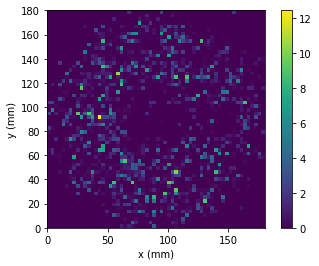

In [8]:
img_0.shape

# Plot the reconstructed image (take a central slice).
plt.imshow(img_0[:,:,29].transpose(),extent=[0,180,0,180],origin='lower')
plt.colorbar()
plt.xlabel("x (mm)")
plt.ylabel("y (mm)")

In [10]:
rec_1                = mr.MLEMReconstructor(libpath=path_to_mlem)
rec_1.TOF            = True
rec_1.TOF_resolution = tof
rec_1.niterations    = n_iterations
rec_1.save_every     = save_every
n_coincidences_1     = len(df_1)
rec_1.prefix = reco_prefix_base + f'im_th1.0_TOF{tof}ps_{n_coincidences_1}coincidences'
img_1 = rec_1.reconstruct(lor_x1_1, lor_y1_1, lor_z1_1, lor_t1_1, lor_x2_1, lor_y2_1, lor_z2_1, lor_t2_1)

Sensitivity matrix not specified: assuming a matrix of 1s.


In [13]:
rec_2                = mr.MLEMReconstructor(libpath=path_to_mlem)
rec_2.TOF            = True
rec_2.TOF_resolution = tof
rec_2.niterations    = n_iterations
rec_2.save_every     = save_every
n_coincidences_2     = len(df_2)
rec_2.prefix = reco_prefix_base + f'_th1.5_TOF{tof}ps_{n_coincidences_2}coincidences'
img_2 = rec_2.reconstruct(lor_x1_2, lor_y1_2, lor_z1_2, lor_t1_2, lor_x2_2, lor_y2_2, lor_z2_2, lor_t2_2)

Sensitivity matrix not specified: assuming a matrix of 1s.


## Load images

In [14]:
the_imgs0 = []
for i in range(0, n_iterations, save_every):
    img = rec_0.read_image(i)
    the_imgs0.append(img)
    
the_imgs1 = []
for i in range(0, n_iterations, save_every):
    img = rec_1.read_image(i)
    the_imgs1.append(img)
    
the_imgs2 = []
for i in range(0, n_iterations, save_every):
    img = rec_2.read_image(i)
    the_imgs2.append(img)

Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes
Read 864000 bytes


## Plot images:

In [1]:
n_iter = 7
slice_min = 25
slice_max = 35
plt.imshow(np.sum(the_imgs2[n_iter][:,:,slice_min:slice_max], axis=2).transpose(),origin='lower')
plt.colorbar();

NameError: name 'plt' is not defined

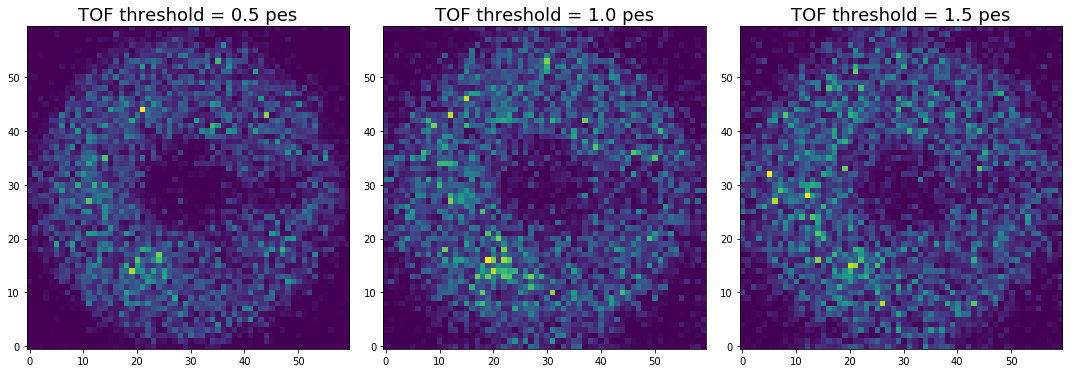

In [29]:
n_iter    = 7
slice_min = 25
slice_max = 35
fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15, 5))
im0 = ax0.imshow(np.sum(the_imgs0[n_iter][:,:,slice_min:slice_max], axis=2).transpose(),origin='lower')
ax0.set_title('TOF threshold = 0.5 pes', fontsize=18)
#plt.colorbar(im0)
im1 = ax1.imshow(np.sum(the_imgs1[n_iter][:,:,slice_min:slice_max], axis=2).transpose(),origin='lower')
ax1.set_title('TOF threshold = 1.0 pes', fontsize=18)
#plt.colorbar(im1)
im2 = ax2.imshow(np.sum(the_imgs2[n_iter][:,:,slice_min:slice_max], axis=2).transpose(),origin='lower')
ax2.set_title('TOF threshold = 1.5 pes', fontsize=18)
#plt.colorbar(im2)
plt.tight_layout()
plt.show()

## Read from one file:

In [ ]:
def read_datafile(input_file, n_coincidences):

    df = pd.read_hdf(input_file)
    df = df.head(n_coincidences)

    true_r1   = df.true_r1  .values
    true_phi1 = df.true_phi1.values
    true_z1   = df.true_z1  .values
    true_t1   = df.true_t1  .values

    reco_r1   = df.reco_r1  .values
    reco_phi1 = df.reco_phi1.values
    reco_z1   = df.reco_z1  .values
    reco_t1   = df.reco_t1  .values

    true_r2   = df.true_r2  .values
    true_phi2 = df.true_phi2.values
    true_z2   = df.true_z2  .values
    true_t2   = df.true_t2  .values

    reco_r2   = df.reco_r2  .values
    reco_phi2 = df.reco_phi2.values
    reco_z2   = df.reco_z2  .values
    reco_t2   = df.reco_t2  .values

    event_ids = df.event_id .values

    return (event_ids, true_r1, true_phi1, true_z1, true_t1,
                       true_r2, true_phi2, true_z2, true_t2,
                       reco_r1, reco_phi1, reco_z1, reco_t1,
                       reco_r2, reco_phi2, reco_z2, reco_t2)

In [ ]:
data_path      = '/Users/carmenromoluque/nexus_petit_analysis/full-body-PET/fastsim/'
data_file      = data_path + 'full_body_phantom_sim_reco_thr1.5pes.0.h5'
n_coincidences = 10000

(evt, true_r1, true_phi1, true_z1, true_t1,
 true_r2, true_phi2, true_z2, true_t2,
 r1, phi1, z1, t1,
 r2, phi2, z2, t2) = read_datafile(data_file, n_coincidences)
print(f"Read {len(evt)} coincidences".format(len(evt)))

lor_x1 = r1*np.cos(phi1); lor_y1 = r1*np.sin(phi1); lor_z1 = z1; lor_t1 = t1;
lor_x2 = r2*np.cos(phi2); lor_y2 = r2*np.sin(phi2); lor_z2 = z2; lor_t2 = t2;